In [124]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

# Randomized Control Experiment

In [125]:
botox = Table.read_table('bta.csv')
botox.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


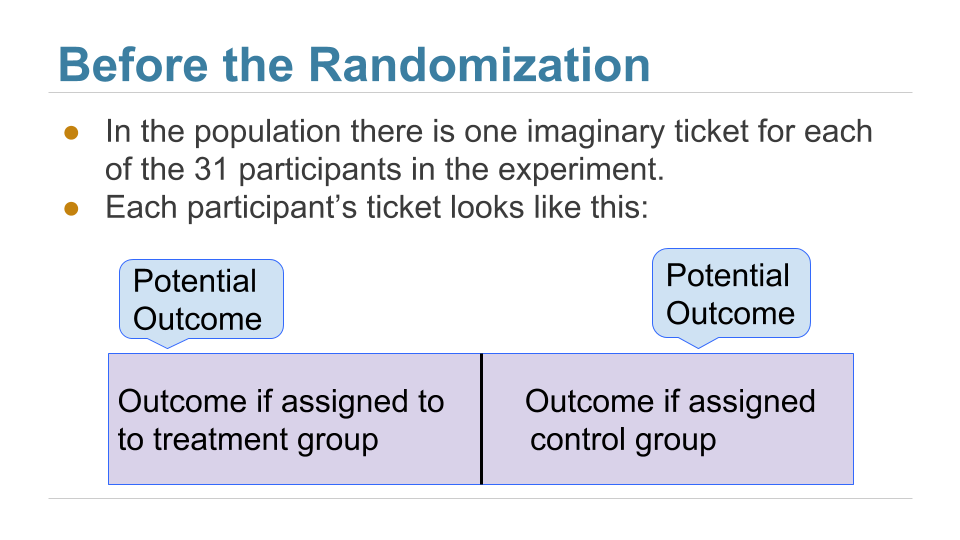

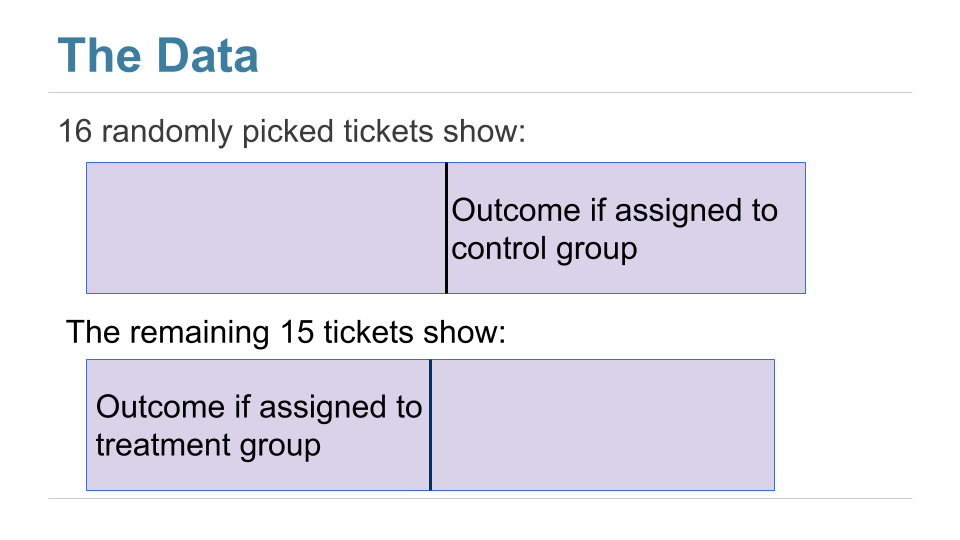

In [126]:
botox.pivot('Result', 'Group')

Group,0.0,1.0
Control,14,2
Treatment,6,9


In [127]:
grouped = botox.group('Group', np.average)
grouped

Group,Result average
Control,0.125
Treatment,0.6


# Testing the Hypothesis

In [128]:
average_column = grouped.column(1)
observed_diff = average_column.item(1) - average_column.item(0)
observed_diff

0.475

# Practice
Use sample without replacement to get a version of the original table with the "Control" and "Treatment" labels shuffled.

In [129]:
# Call shuffle on the original table
botox_shuffled = botox.sample(with_replacement=False)

# Replace the "Result" column of the shuffled table with the "Result" column from the original table
# Using with_column with the column name "Result" will replace the existing result column
botox_shuffled = botox_shuffled.with_column("Result",botox.column(1))

# Group the new table and calculuate the test statistic (difference of means)
diff2 = botox_shuffled.group("Group",np.average)
mean= diff2.column(1)
diff=mean.item(1)-mean.item(0)
diff




0.08750000000000002

In [130]:
# Simulate many times
simulated_diffs = make_array()

for i in np.arange(10000):
    botox_shuffled = botox.sample(with_replacement=False)
    botox_shuffled = botox_shuffled.with_column('Result', botox.column(1))
    grouped = botox_shuffled.group('Group', np.average)
    diff = grouped.column(1).item(1) - grouped.column(1).item(0)
    simulated_diffs = np.append(simulated_diffs, diff)

simulated_diffs

array([-0.3       , -0.04166667, -0.04166667, ...,  0.21666667,
        0.0875    , -0.3       ])

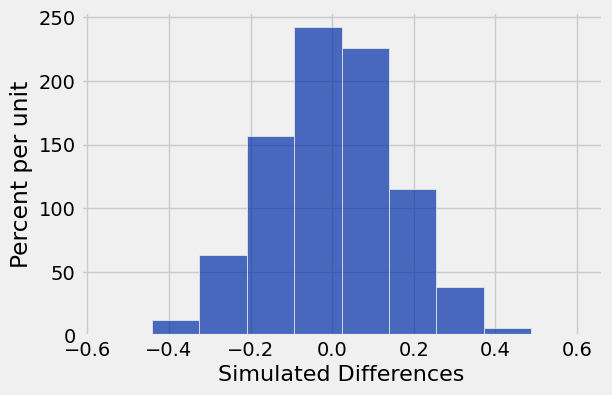

In [131]:
Table().with_column('Simulated Differences', simulated_diffs).hist()

In [133]:
# Use np.count_nonzero to calculuate the p-value
np.count_nonzero(simulated_diffs >= observed_diff)

68